# **実習中の安全確認**

学校で行う実習や実験はつねに危険が伴います。生徒が正しく作業しているかを確認するため、「作業者が何人いるか」を自動的に顔検出アプリでカウントしたい。

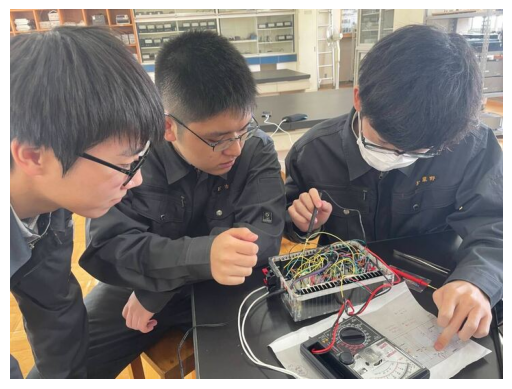

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("kougyou.jpg")          # 画像を読み込む
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR → RGB に変換

plt.imshow(img)     # 表示
plt.axis("off")     # 余計な枠を消す
plt.show()


YOLOをつかって顔認識をします。   


検出された顔の数: 3 faces


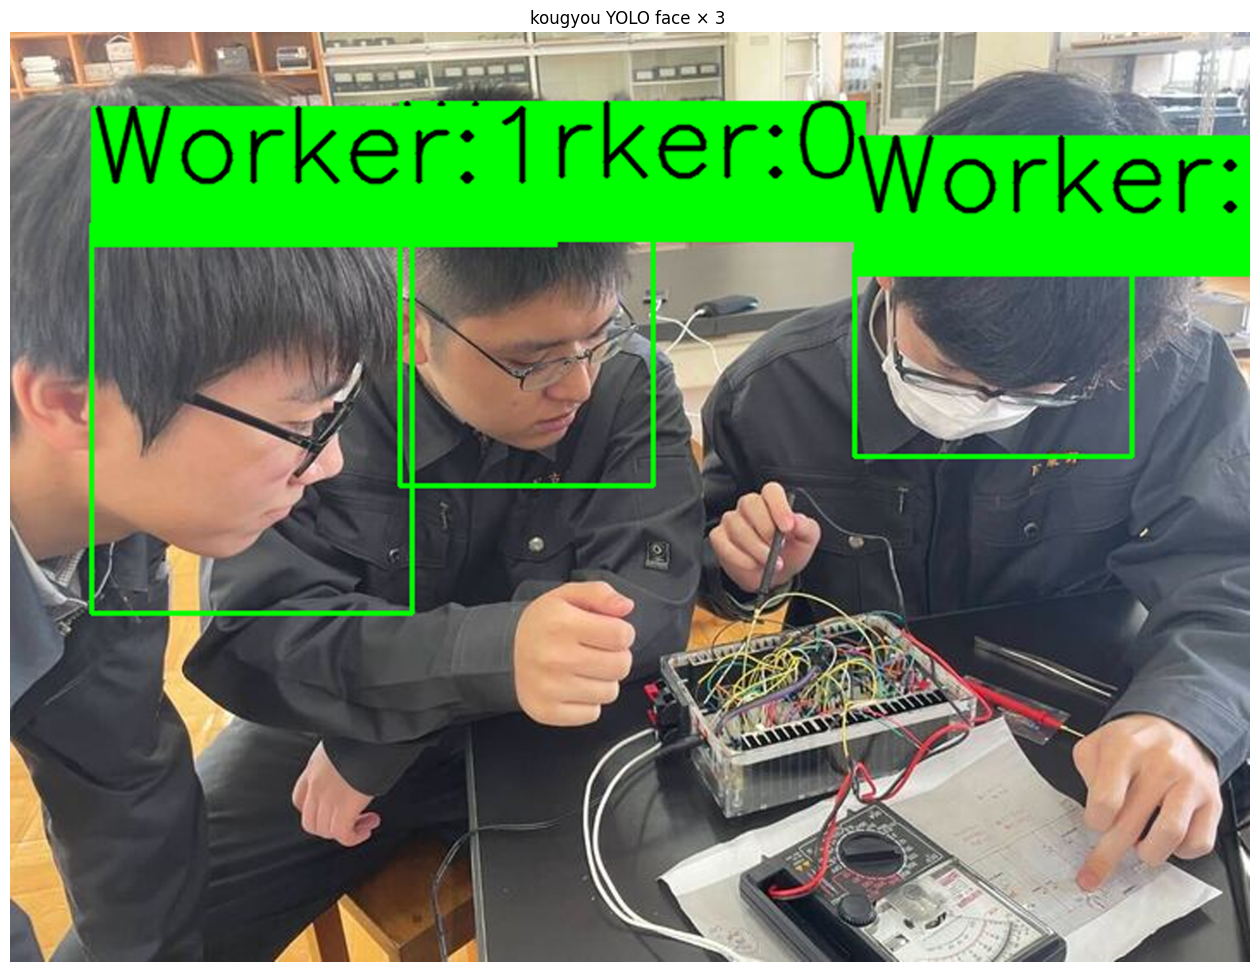

In [5]:
import cv2
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 画像とモデルの準備
image_path = Path("kougyou.jpg")
model_path = Path("yolov8m-face.pt")

# YOLO で高解像度推論（imgsz を指定）
model = YOLO(model_path)
result = model.predict(source=str(image_path), conf=0.25, verbose=False, imgsz=1280)[0]

# 画像読み込みと基本情報
annotated = cv2.imread(str(image_path))
h_img, w_img = annotated.shape[:2]
color = (0,255,0)
font_scale = 2
thickness = 2

# 検出結果を描画（バッファ付き）
for idx, box in enumerate(result.boxes.xyxy.cpu().numpy()):
    x1,y1,x2,y2 = map(int, box)
    w = x2 - x1; h = y2 - y1
    pad = int(max(w,h) * 0.2)  # バッファ 20%
    x1p = max(0, x1 - pad); y1p = max(0, y1 - pad)
    x2p = min(w_img, x2 + pad); y2p = min(h_img, y2 + pad)
    cv2.rectangle(annotated, (x1p,y1p), (x2p,y2p), color, thickness)
    label = f"Worker:{idx}"
    (w_label, h_label), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
    y_label = y1p-6 if y1p-6>h_label else y1p+h_label+6
    cv2.rectangle(annotated, (x1p, y_label-h_label-baseline), (x1p+w_label, y_label+baseline), color, -1)
    cv2.putText(annotated, label, (x1p, y_label-baseline), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0,0,0), thickness, cv2.LINE_AA)

# 高解像度で保存（アップスケールして保存）
output_path = Path("kougyou_kao.jpg")
annot_up = cv2.resize(annotated, (w_img*2, h_img*2), interpolation=cv2.INTER_CUBIC)
cv2.imwrite(str(output_path), annot_up)
print(f"検出された顔の数: {len(result.boxes)} faces")
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(annot_up, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'kougyou YOLO face × {len(result.boxes)} ')
plt.show()

# **分析結果**  

画像に写っている3人をすべて認識できた。  
マスクと眼鏡をして下を向いていてもしっかり検出できた。